In [1]:
import eeg_decoder
import numpy as np
from collections import OrderedDict
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name = 'd01'
data_dir = f'./data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False,trim_timepoints=[-200,1000])

In [3]:
time_window = 50
time_step = 25
trial_bin_size = 20
n_splits = 30
group_dict_list = [OrderedDict([('ss1_vdis',[11]),('ss2',[20])]),OrderedDict([('ss1_dis',[12]),('ss2',[20])]),OrderedDict([('ss1_sim',[13]),('ss2',[20])])]
group_dict_list = [OrderedDict([('ss1_vdis',[11]),('ss1_dis',[12])]),OrderedDict([('ss1_vdis',[11]),('ss1_sim',[13])])]
wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_bin_size,n_splits,group_dict_list=group_dict_list)
clfr = eeg_decoder.Classification(wrangl,exp.nsub,num_labels=2)

In [4]:
clfr.acc = np.zeros((clfr.nsub,len(group_dict_list),np.size(clfr.t),clfr.n_splits))*np.nan
clfr.acc_shuff = np.zeros((clfr.nsub,len(group_dict_list),np.size(clfr.t),clfr.n_splits))*np.nan
clfr.conf_mat = np.zeros((clfr.nsub,len(group_dict_list),np.size(clfr.t),clfr.n_splits,clfr.num_labels,clfr.num_labels))*np.nan

for isub in range(exp.nsub):
    print(isub)

    xdata_all,ydata_all = exp.load_eeg(isub)
    
    for xdata,ydata in wrangl.pairwise(xdata_all,ydata_all):

        for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_split_data(xdata,ydata):

            X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
            y_test_shuffle = np.random.permutation(y_test)

            for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
                clfr.decode_pairwise(X_train,X_test,y_train,y_test,y_test_shuffle,isub)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [5]:
interp = eeg_decoder.Interpreter(clfr)

In [6]:
a = np.mean(np.mean(interp.acc[:,:,interp.t>0],3),2)[:,0]
b = np.mean(np.mean(interp.acc[:,:,interp.t>0],3),2)[:,1]

In [7]:
import scipy.stats as sista

In [8]:
wrangl.labels

[['ss1_vdis', 'ss1_dis'], ['ss1_vdis', 'ss1_sim']]

1 (vdiff) vs 1 (diff) mean delay accuracy: 0.5547376543209875
1 (vdiff) vs 1 (diff) mean delay S.D.: 0.02423370724967494
1 (vdiff) vs 1 (sim) mean delay accuracy: 0.5719753086419754
1 (vdiff) vs 1 (sim) mean delay S.D.: 0.037016146371705846
mean delay accuracy: 0.5719753086419754
mean delay S.D.: 0.037016146371705846


d:\Discus\analysis\eeg_decoder.py:1304: UserWarning: Attempting to set identical left == right == 952 results in singular transformations; automatically expanding.
  plt.xlim(max(self.t), max(self.t))


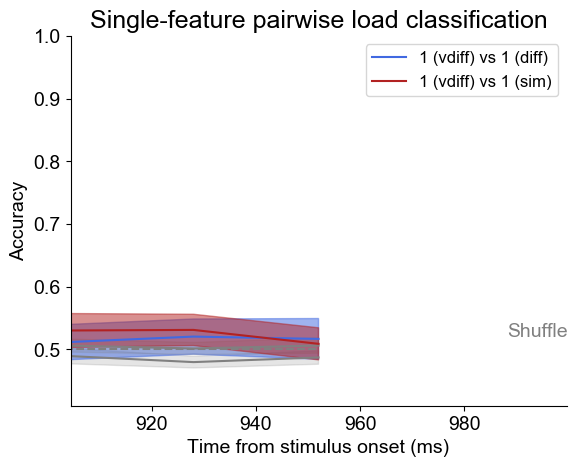

In [11]:
interp.plot_acc_subset(
    # subset_list=['1 (vdiff) vs 2','1 (diff) vs 2','1 (sim) vs 2'],
    subset_list=['1 (vdiff) vs 1 (diff)', '1 (vdiff) vs 1 (sim)'],
    ylim=[.41,1], 
    chance=.5, 
    sig_ys=[.47,.455,.44],
    chance_text_y=.225,
    significance_testing=True,
    title='Single-feature pairwise load classification',
    subtitle = '_single_feat_ss',
    savefig=True)

In [11]:
4000/150000

0.02666666666666667

In [13]:
4000/40000

0.1